In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch.utils.data as Data
from torch.nn import init
import torch.optim as optim

from importlib import reload
import pytorch as pts

/home/ghzuo/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
torch.manual_seed(1)
print(torch.__version__)
torch.set_default_tensor_type("torch.FloatTensor")

1.10.2


# Linear Regression

## Generate Data

In [3]:
num_inputs = 2
num_examples = 1000
true_w = np.array([[2, -3.4]])
true_b = 4.2
features = np.random.normal(0, 1, (num_examples, num_inputs))
labels = np.dot(features, true_w.T) + true_b 
labels += np.random.normal(0, 0.01, (num_examples, 1))
lables = labels.reshape(num_examples)

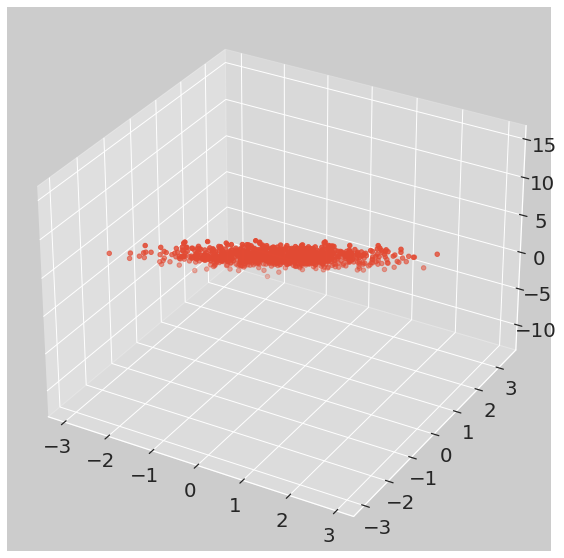

In [4]:
pts.ln3plot(features, labels)

## Read Data

In [5]:
features = torch.tensor(features, dtype=torch.float)
labels = torch.tensor(lables, dtype=torch.float)
data_iter = pts.pack_data(features, labels)

## Define Model

In [6]:
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)

    def forward(self, x):
        y = self.linear(x)
        return y
    
net = LinearNet(num_inputs)

In [7]:
print(net, "\n") 
for name, param in net.named_parameters():
    print(name, "\t", param)

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
) 

linear.weight 	 Parameter containing:
tensor([[ 0.3643, -0.3121]], requires_grad=True)
linear.bias 	 Parameter containing:
tensor([-0.1371], requires_grad=True)


In [8]:
## initial Models
init.normal_(net.linear.weight, mean=0.0, std=0.01)
init.constant_(net.linear.bias, val=0.0) 

Parameter containing:
tensor([0.], requires_grad=True)

## Loss Function

In [9]:
loss = nn.MSELoss()

## Optimization Algorithm

In [10]:
optimizer = optim.SGD(net.parameters(), lr=0.03)

# 为不同子网络设置不同的学习率
# optimizer =optim.SGD([
#                 # 如果对某个参数不指定学习率，就使用最外层的默认学习率
#                 {'params': net.subnet1.parameters()}, # lr=0.03
#                 {'params': net.subnet2.parameters(), 'lr': 0.01}
#             ], lr=0.03)
# # 调整学习率
# for param_group in optimizer.param_groups:
#     param_group['lr'] *= 0.1 # 学习率为之前的0.1倍
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)


## Fit Model

In [11]:
## 使用缺省的训练模型
#pts.fit(net, data_iter)  ## 使用缺省的损失函数与优化器
pts.fit(net, data_iter, loss, optimizer, 4)

epoch 1, loss: 0.000348
epoch 2, loss: 0.000131
epoch 3, loss: 0.000109
epoch 4, loss: 0.000116


## The Results

In [12]:
dense = net.linear
print(true_w, "\t", dense.weight.data)
print(true_b, "\t", dense.bias.data)

[[ 2.  -3.4]] 	 tensor([[ 2.0001, -3.3993]])
4.2 	 tensor([4.1997])


# Multi-Layers Perceptron

## Build Models